In [1]:
# Exploring Data, Data Cleaning, changing variables based on what the values were assinged from a newspaper in the Suffolk County
# Also importing libraries that will be needed


import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np


df = pd.read_csv('https://raw.githubusercontent.com/nickkas/python_ml_ect_/master/hmda.txt',delimiter='\t')

df.info()

df.isna().sum()
df.isnull().sum()

df.rename(columns={'s5':'occupancy','s7':'approve','s11':'county','s13':'race',
                   's15':'sex','s17':'income','s23a':'married','s27a':'self_employed',
                   's33':'purchase_price','s34':'other_financing','s35':'liquid_assets',
                   's40':'credit_history','s42':'chmp','s43':'chcp','s44':'chpr',
                   's45':'debt_to_expense','s46':'di_ratio','s50':'appraisal',
                   's53':'pmi_denied','netw':'net_worth','uria':'unemployment',
                   'school':'education','s56':'unverifiable',
                   's52':'pmi_sought'},inplace=True)





df['approved'] = [1 if X == 3 else 0 for X in df['approve']]
df['race'] = [0 if X == 3 else 1 for X in df['race']]
df['married'] = [1 if X == 'M' else 0 for X in df['married']]
df['sex'] = [1 if X == 1 else 0 for X in df['sex']]
df['credit_history'] = [1 if X == 1 else 0 for X in df['credit_history']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 62 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   seq      2380 non-null   int64  
 1   s3       2380 non-null   int64  
 2   s4       2380 non-null   int64  
 3   s5       2380 non-null   int64  
 4   s6       2380 non-null   int64  
 5   s7       2380 non-null   int64  
 6   s9       2380 non-null   int64  
 7   s11      2380 non-null   int64  
 8   s13      2380 non-null   int64  
 9   s14      2379 non-null   float64
 10  s15      2380 non-null   int64  
 11  s16      2379 non-null   float64
 12  s17      2380 non-null   float64
 13  s18      2265 non-null   float64
 14  s19a     193 non-null    object 
 15  s19b     246 non-null    float64
 16  s19c     86 non-null     float64
 17  s19d     13 non-null     float64
 18  s20      2380 non-null   float64
 19  s23a     2378 non-null   object 
 20  s24a     2380 non-null   int64  
 21  s25a     2380 

<Axes: >

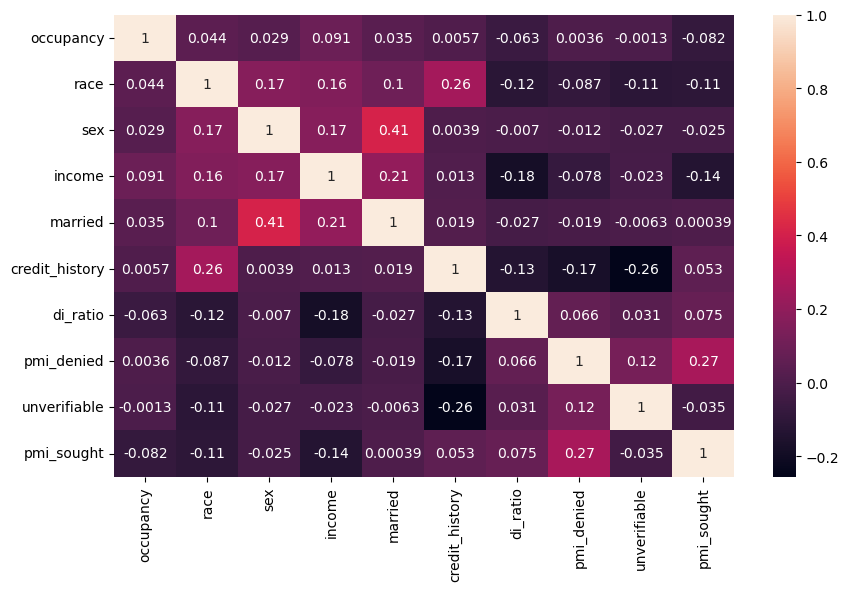

In [2]:
#df1 is a copy of the original dataframe(df) this is done so it can be ran through labelencoder for visuals
# of the hmda dataset. The features that will be used are shown below and they were selected due to the relevancy
# each feature had on the dependent variable(approved). That is, wether or not the applicant was approved or denied 
# a loan in the Suffolk county area


df1 = df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in df1:
    df1[i] = le.fit_transform(df1[i])


# Features that will be selected for the models

features = ['occupancy','race','sex','income','married','credit_history','di_ratio',
            'pmi_denied','unverifiable','pmi_sought']



import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df1[features].corr(), annot=True)

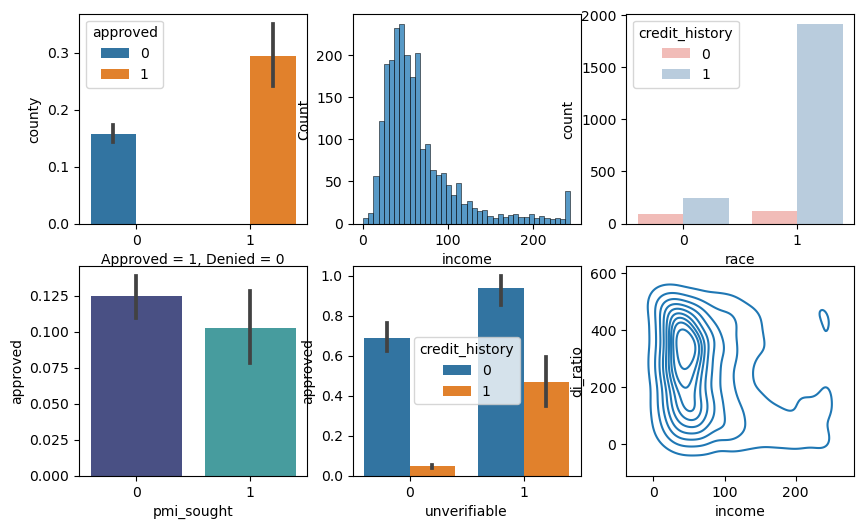

In [3]:
# suplots to breifly visualize the chose features from the hmda dataset
def subplots(df1):
    plt_,axs = plt.subplots(2,3,figsize=(10,6))
    sns.barplot(x='approved',y='county',ax=axs[0,0],data=df1,hue='approved')
    axs[0,0].set_label('approved VS county(Suffolk)')
    axs[0,0].set_xlabel('Approved = 1, Denied = 0')
    sns.histplot(x='income',ax=axs[0,1],data=df1)
    axs[0,1].set_label('Histogram of distribution of income')
    sns.countplot(x='race',ax=axs[0,2],data=df1,hue='credit_history',palette='Pastel1')
    axs[1,0].set_xlabel('0 = Black Applicant, 1 = White applicant')
    sns.barplot(x='pmi_sought',y='approved',ax=axs[1,0],data=df1,palette='mako')
    sns.barplot(x='unverifiable',y='approved',ax=axs[1,1],data=df1,hue='credit_history')
    sns.kdeplot(x='income',y='di_ratio',ax=axs[1,2],data=df1)
    plt.show()


subplots(df1)

In [4]:
# X will consist of the features mentioned earlier and y will be the dependent variable that was mentioned earlier
# X and Y will be ran through statsmodels for the purpose of showing the the statistical significance. 
# then, a train/test split will be used on X and y to make a training and testing X and Y value for the features
# standard scaler is used in the data preprocessing portion for both X_train and X_test.  

X = df[features]
y = df.approved

y.value_counts(normalize=True)


import statsmodels.api as sm

model = sm.OLS(y,X).fit()
print(model.summary())

# Train/Test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)

# Scaling the X values using Standard Scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

                                 OLS Regression Results                                
Dep. Variable:               approved   R-squared (uncentered):                   0.519
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              255.3
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                        0.00
Time:                        11:39:30   Log-Likelihood:                          18.586
No. Observations:                2380   AIC:                                     -17.17
Df Residuals:                    2370   BIC:                                      40.58
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [5]:
#models that will be used for the training data
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier

rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
BC = BaggingClassifier()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


from sklearn.svm import SVC
svc = SVC(probability=True)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


In [6]:
#All training models will now be evaluated through the user defined function below. The purpose of using ensemble methods
# like Random forest,Gradient Boost and Bagging is to show how the accuracy of thedata, when classified, is scored
# based on the bias and variance not impacted the perforance of the data. The roc score will show the predicted probabilities, 
# that is: The true positive rate,true negative rate,false positive rate and false negative rate of the classifiers
# in this model evaluation, the ensemble methods have a lower roc score then the logistic regression classifier, meaning
# that the feature selection during the EDA and data cleaning was (more)accurate

from sklearn.metrics import roc_auc_score,roc_curve,f1_score,accuracy_score


def evaluate_model(model,X_train_scaled,X_test_scaled,y_train,y_test):
    model = model.fit(X_train_scaled,y_train)
    pred = model.predict(X_test_scaled)
    pred_prob = model.predict_proba(X_test_scaled)[:,1]
    acc = accuracy_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc = roc_auc_score(y_test, pred_prob)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --roc-- {roc*100:.2f}%; --f1-- {f1*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)
rfc_pred,rfc_pred_prob = evaluate_model(rfc, X_train_scaled, X_test_scaled, y_train, y_test)
gbc_pred,gbc_pred_prob = evaluate_model(gbc, X_train_scaled, X_test_scaled, y_train, y_test)
BC_pred,BC_pred_prob = evaluate_model(BC, X_train_scaled, X_test_scaled, y_train, y_test)
lda_pred,lda_pred_prob = evaluate_model(lda, X_train_scaled, X_test_scaled, y_train, y_test)
svc_pred,svc_pred_prob = evaluate_model(svc, X_train_scaled, X_test_scaled, y_train, y_test)
knn_pred,knn_pred_prob = evaluate_model(knn, X_train_scaled, X_test_scaled, y_train, y_test)

LogisticRegression, --Accuracy-- 94.75%; --roc-- 91.82%; --f1-- 75.25%
RandomForestClassifier, --Accuracy-- 94.54%; --roc-- 91.80%; --f1-- 74.51%
GradientBoostingClassifier, --Accuracy-- 93.07%; --roc-- 91.26%; --f1-- 67.96%
BaggingClassifier, --Accuracy-- 93.07%; --roc-- 90.16%; --f1-- 67.96%
LinearDiscriminantAnalysis, --Accuracy-- 95.17%; --roc-- 91.73%; --f1-- 78.10%
SVC, --Accuracy-- 94.33%; --roc-- 90.82%; --f1-- 74.29%
KNeighborsClassifier, --Accuracy-- 93.28%; --roc-- 89.83%; --f1-- 68.63%


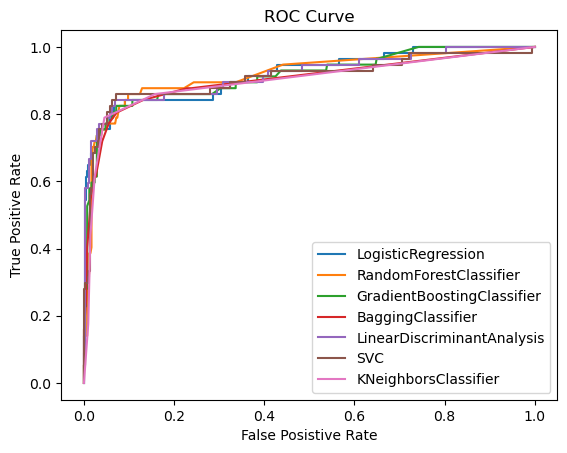

In [7]:
# A visual display of all of the roc scores in a single plot on a roc curve
def ROC(y_test,y_pred_prob,model):
    fpr,tpr, _ = roc_curve(y_test,y_pred_prob)
    plt.plot(fpr,tpr,label=model.__class__.__name__)
    plt.xlabel('False Posistive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
    

ROC(y_test, lr_pred_prob, lr)
ROC(y_test, rfc_pred_prob, rfc)
ROC(y_test,gbc_pred_prob,gbc)
ROC(y_test,BC_pred_prob,BC)
ROC(y_test,lda_pred_prob,lda)
ROC(y_test,svc_pred_prob,svc)
ROC(y_test,knn_pred_prob,knn)
plt.legend()
plt.show()

In [8]:
#Now a GridSearch to tune the hyperparameters of the classifiers

from sklearn.model_selection import GridSearchCV

#GridSearchCV for Logistic Regression Model

lr_param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
lr_grid = GridSearchCV(LogisticRegression(),param_grid=lr_param_grid,scoring='roc_auc',cv=5).fit(X_train_scaled,y_train)
lr_grid_pred = lr_grid.best_estimator_.predict(X_test_scaled)
lr_grid_pred_prob = lr_grid.best_estimator_.predict_proba(X_test_scaled)[::,1]
print(f'Best ROC AUC score: {lr_grid.best_score_*100:.2f}%')
print('Predicted', np.round(lr_grid_pred_prob*100,2).max())



#Random Forest Gridsearch


rfc_param_grid = {
    'n_estimators': [50,100],
    'max_depth': [None,10],
    'min_samples_split':[2,5],
    'min_samples_leaf': [1,2]
}

rfc_grid = GridSearchCV(RandomForestClassifier(),param_grid=rfc_param_grid,scoring='roc_auc',cv=5).fit(X_train_scaled,y_train)
rfc_grid_pred = rfc_grid.best_estimator_.predict(X_test_scaled)
rfc_grid_pred_prob = rfc_grid.best_estimator_.predict_proba(X_test)[::,1]
print(f'Best ROC AUC score for Random Forest: {rfc_grid.best_score_*100:.2f}%')
print('Predicted',np.round(rfc_grid_pred_prob*100,2).max())


#Gradient Boost GridSearch

gbc_param_grid = {
    'n_estimators':[50,100],
    'learning_rate':[0.01,0.1],
    'max_depth':[3,5],
    'min_samples_split':[2,5]
}
gbc_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=gbc_param_grid, scoring='roc_auc', cv=5).fit(X_train_scaled,y_train)
gbc_grid_pred = gbc_grid.best_estimator_.predict(X_test_scaled)
gbc_grid_pred_prob = gbc_grid.best_estimator_.predict_proba(X_test_scaled)[:,1]
print(f'Best ROC AUC score for Gradient Boosting: {gbc_grid.best_score_*100:.2f}%')
print('Predicted', np.round(gbc_grid_pred_prob*100,2).max())



# Support Vector Machine GridSearch

svc_param_grid ={'C':[0.001,0.01,0.1,1,10,100],'gamma':['scale', 'auto']}
svc_grid = GridSearchCV(SVC(probability=True),param_grid=svc_param_grid,scoring='roc_auc',cv=10).fit(X_train_scaled,y_train)
svc_grid_pred = svc_grid.best_estimator_.predict(X_test_scaled)
svc_grid_pred_prob = svc_grid.best_estimator_.predict_proba(X_test_scaled)[:,1]
print(f'Best ROC AUC score for Support Vector Machine: {svc_grid.best_score_*100:.2f}%')
print('Predicted', np.round(svc_grid_pred_prob*100,2).max())


# K-Nearest Neighbors


knn_param_grid = {'n_neighbors':[3,5,7],'p':[1,2]}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid,scoring='roc_auc',cv=5).fit(X_train_scaled,y_train)
knn_grid_pred = knn_grid.best_estimator_.predict(X_test_scaled)
knn_grid_pred_prob = knn_grid.best_estimator_.predict_proba(X_test_scaled)[::,1]
print(f'Best ROC AUC score for K-Nearest Neighbors: {knn_grid.best_score_*100:.2f}%')
print('Predicted', np.round(knn_grid_pred_prob*100,2).max())


# Bagging Classifier GridSearch

BC_param_grid = {
    'n_estimators': [10,50,100],
    'max_samples': [0.5,0.7,1.0],
}



BC_grid = GridSearchCV(BaggingClassifier(),param_grid=BC_param_grid,scoring='roc_auc',cv=5).fit(X_train_scaled,y_train)
BC_grid_pred = BC_grid.best_estimator_.predict(X_test_scaled)
BC_grid_pred_prob = BC_grid.best_estimator_.predict_proba(X_test_scaled)[::,1]
print(f'Bagging Classifier - Best Parameters: {BC_grid.best_params_}')
print(f'Bagging Classifier - Best ROC-AUC Score: {BC_grid.best_score_ * 100:.2f}%')

Best ROC AUC score: 91.45%
Predicted 100.0
Best ROC AUC score for Random Forest: 90.48%
Predicted 42.64
Best ROC AUC score for Gradient Boosting: 91.21%
Predicted 99.22
Best ROC AUC score for Support Vector Machine: 88.65%
Predicted 97.5
Best ROC AUC score for K-Nearest Neighbors: 85.26%
Predicted 100.0
Bagging Classifier - Best Parameters: {'max_samples': 0.5, 'n_estimators': 100}
Bagging Classifier - Best ROC-AUC Score: 86.76%
